# Modeling House and Rent Prices Using Neighborhood Factors across the US
Austin Wu, Eliza Hale, Cody He, Anna Zhong for CS109

## Contents

<a href="#project_overview">1. Project Overview</a>

- <a href="#project_overview">Background and Motivation</a>
- <a href="#project_overview">Questions</a>
- <a href="#project_overview">Our Approach</a>

<a href="#data">2. Data</a>

- <a href="#data">2.1 House and Rental Price Data</a>
- <a href="#dem_data">2.2 Demographic Data</a>
- <a href="#biz_data">2.3 Business Data</a>

<a href="#exploration">3. Exploratory Analysis<a/>

- <a href="#exploration">3.1 Neighborhood Trends in Demographic and Business Type</a>
- <a href="#exploration_price">3.2 Price Trends</a>

<a href="#modeling">4. Modeling</a>
- <a href="#modeling">4.1 Model Features</a>
- <a href="#model_train">4.2 Train/Test Data</a>
- <a href="#baseline">4.3 Baseline Prediction</a>
- <a href="#regression">4.4 Regression (and other models)</a>

<a href="#conclusion">5. Conclusion</a>

<a id="project_overview"></a>
# 1. Project Overview

## Background and Motivation
Provide an overview of the project goals and the motivation for it. Consider that this will be read by people who did not see your project proposal.

## Questions

Initially we were interested in looking at changes in housing prices across the US from 2000 to 2010, and how differences in demographic and business features between regions might be able to predict the change in housing prices. Our first decision was to decide the granularity of our data in terms of geographic divisions. We chose to perform our analysis at the zipcode level in order to maximize the sample size for our regression and to eliminate the intra-region heterogeneity that exists with larger geographies. 


## Our Approach
We initially retrieved zipcode-level data for median sale price ber square foot data for zipcodes across the united state from Zillow, a real estate database company. For our predictors, we aggregated data from a variety of sources. Initially, we used 2010 census data which detailed zipcode-level demographic data. As we iterated through various regression models, we sought to improve our models by adding new predictors to our regression. We aggregated jail data, median income data, from Yelp, ---. We also built a python script that would allow us to use features from Census data that only existed at the county level and mapped the values to the corresonding zipcodes within the county. We gathered our predictors and merged them with the housing price data by zipcode.

We first regressed census data along with jail/prison data on change in housing prices from 2000 to 2010. Our first model had very low explanatory power, so we sought more features. However, as we thought about the story we wanted to tell, we started thinking that examining other response variables might lend to more interesting and easily interpretable conclusions. We looked at a Zillow metric for home values that accounts for some biases that come with using their raw house price data. We also eventually looked at price-to-rent ratio.
With regards to gathering and organizing our data, some of our data, like the 2010 census data and the Zillow real estate data, we were able to download tables that we converted to pandas and cleaned by dropping the NANs in the years we wished to analyze and other miscellenaeous modifications. We stored our pandas dataframes by pickling them.
For Yelp we randomly sampled zipcodes, grabbed businesses in categories in active, arts, education, nightlife, pets, shopping, restaurants, took proportion of busineseses in each category to get businesses, transformed data, made binary indicator variables.

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

<a id="data"></a>
# 2. Data

<a id="data"></a>
## 2.1 House and Rental Price Data

All of the data for our house prices and rental prices came from Zillow at http://www.zillow.com/research/data/. We had originally wanted to model the delta between price data from two points in time (2000 vs 2010). This raised two concerns:

1. Was the delta the best information to model?
2. Which years would be the most appropriate to do our analysis on given the data available to us for features of our model?

Then talk through how we resolved this and tell a story using some data.

In [5]:
zip_MSPPS = pd.read_csv('Zip_MedianSoldPricePerSqft_AllHomes.csv')
zip_MSPPS.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,62080,11368,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84630,60629,Chicago,IL,Chicago,Cook,2,83.3729,81.9039,86.2227,88.2281,92.4941,88.4356,84.2880,86.4587,87.2849,82.1885,84.3404,85.3516,83.9546,80.3261,80.8496,85.4139,87.8756,86.3272,86.9252,88.9441,84.8332,82.1182,82.8501,85.9554,85.4117,85.6305,90.6093,92.3588,95.8791,95.4600,97.4595,94.5612,91.3699,91.5263,90.7089,94.4271,92.9856,93.5025,95.1732,98.5480,97.9914,100.6991,101.1288,...,109.0509,100.4555,97.2719,95.8577,101.9246,106.3171,109.1850,115.7075,120.9565,124.7645,123.4396,118.7330,122.6573,106.9069,103.3210,102.9773,101.968100,108.3858,102.5008,111.5418,110.0932,103.3630,94.8442,99.4525,103.1513,123.4814,119.6632,125.0165,118.4917,112.127800,121.5239,120.1162,115.2933,103.542500,105.5923,121.6394,126.1742,125.6553,116.9917,113.1415,118.9884,107.6563,107.2762,109.5701,116.6246,111.9092,114.7804,127.931300,132.5965,131.3061
2,96193,90650,Norwalk,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,3,117.3969,118.0225,113.3146,112.0347,114.1521,113.2268,111.2448,109.2356,112.6931,115.6738,115.9940,108.9467,113.3924,110.7738,108.5902,110.6241,113.3821,117.6624,114.2688,112.9188,114.2251,116.3165,111.2844,111.1042,112.2943,117.9401,117.9640,117.6704,117.3105,114.7438,115.1906,113.4917,119.0176,118.3696,119.5861,120.8136,122.6741,122.6501,123.3720,124.8398,125.4529,126.7413,127.6706,...,229.1417,235.6075,227.5498,219.8136,236.8887,234.3855,225.6425,229.9889,224.8353,227.7036,234.5118,234.7218,228.2131,221.8379,231.7794,230.8116,249.953400,258.6240,247.0731,248.9392,250.8335,266.6558,266.6535,268.9651,282.5015,287.1165,293.1764,281.2928,291.0114,282.929600,298.6052,289.6318,294.9153,300.241400,303.2769,291.9878,303.5781,314.2814,327.2802,317.2496,312.0753,297.1876,287.1131,305.2852,314.4935,339.6102,341.7029,339.365500,336.4867,343.4985
3,62037,11226,New York,NY,New York,Kings,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.330544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62093,11385,New York,NY,New York,Queens,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.102389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.941748,NaN,NaN


In [4]:
zip_MSPPS.shape

(10669, 242)

In [15]:
#Drop rows that have NAN for those dates
zip_MSPPS_notNAN = zip_MSPPS.dropna(subset = ['2000-01','2001-01','1999-01','2010-01','2009-01','2011-01'])
#Cast Zipcodes as strings and add 0s to the beginning of the zipcodes if they are less than 5 characters
zip_MSPPS_notNAN['RegionName'] = zip_MSPPS_notNAN['RegionName'].astype(str)
zip_MSPPS_notNAN.RegionName = [(5-len(zipcode))*'0' + zipcode if len(zipcode) < 5 else zipcode for zipcode in zip_MSPPS_notNAN.RegionName]

/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/hes/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
zip_MSPPS_notNAN.shape

(1678, 242)

In [23]:
# We've added averaged 2000/2010 data at the end and taken a percent change which is our response variable
zip_MSPPS_notNAN.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2000_agg,2010_agg,pct_delta
1,84630,60629,Chicago,IL,Chicago,Cook,2,83.37290,81.9039,86.2227,88.2281,92.4941,88.4356,84.2880,86.4587,87.2849,82.1885,84.3404,85.3516,83.9546,80.3261,80.8496,85.4139,87.8756,86.3272,86.9252,88.9441,84.8332,82.1182,82.8501,85.955400,85.4117,85.6305,90.6093,92.3588,95.8791,95.4600,97.4595,94.5612,91.3699,91.5263,90.7089,94.4271,92.9856,93.5025,95.1732,98.5480,97.9914,100.6991,101.1288,...,95.8577,101.924600,106.3171,109.1850,115.7075,120.956500,124.7645,123.4396,118.7330,122.6573,106.9069,103.3210,102.9773,101.9681,108.3858,102.5008,111.5418,110.0932,103.3630,94.8442,99.4525,103.1513,123.4814,119.6632,125.0165,118.4917,112.1278,121.5239,120.1162,115.293300,103.5425,105.5923,121.6394,126.17420,125.6553,116.9917,113.141500,118.9884,107.6563,107.276200,109.5701,116.6246,111.9092,114.7804,127.9313,132.5965,131.306100,98.682400,115.605500,1.171491
2,96193,90650,Norwalk,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,3,117.39690,118.0225,113.3146,112.0347,114.1521,113.2268,111.2448,109.2356,112.6931,115.6738,115.9940,108.9467,113.3924,110.7738,108.5902,110.6241,113.3821,117.6624,114.2688,112.9188,114.2251,116.3165,111.2844,111.104200,112.2943,117.9401,117.9640,117.6704,117.3105,114.7438,115.1906,113.4917,119.0176,118.3696,119.5861,120.8136,122.6741,122.6501,123.3720,124.8398,125.4529,126.7413,127.6706,...,219.8136,236.888700,234.3855,225.6425,229.9889,224.835300,227.7036,234.5118,234.7218,228.2131,221.8379,231.7794,230.8116,249.9534,258.6240,247.0731,248.9392,250.8335,266.6558,266.6535,268.9651,282.5015,287.1165,293.1764,281.2928,291.0114,282.9296,298.6052,289.6318,294.915300,300.2414,303.2769,291.9878,303.57810,314.2814,327.2802,317.249600,312.0753,297.1876,287.113100,305.2852,314.4935,339.6102,341.7029,339.3655,336.4867,343.498500,130.505400,229.691000,1.760011
7,96125,90280,South Gate,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,8,118.30150,121.3851,117.8144,122.3694,124.6468,122.9418,119.5063,118.1009,122.6550,121.1318,118.7361,112.8810,115.2853,114.9234,116.5601,115.7037,115.4531,117.2410,123.1254,117.5763,116.3737,117.3234,112.4569,116.410400,120.8716,121.4901,117.2832,119.2311,118.1527,123.1749,115.0169,114.8405,117.6092,119.9959,121.5556,118.0527,118.2184,119.1929,122.5280,119.8428,115.2839,117.3491,119.3010,...,NaN,214.758811,202.8838,NaN,NaN,191.730827,NaN,202.3067,213.5910,NaN,201.5256,NaN,228.0380,NaN,209.3866,207.7554,222.7143,214.7797,245.8332,237.6460,215.1479,236.1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.610169,NaN,NaN,NaN,272.65861,NaN,NaN,242.248062,NaN,NaN,266.089109,267.5440,281.4984,303.1221,312.5424,NaN,NaN,279.620853,130.197000,212.896167,1.635185
10,84620,60618,Chicago,IL,Chicago,Cook,11,130.28169,121.4685,127.4808,125.9311,119.8565,107.3306,103.7671,112.6521,118.0756,107.7247,NaN,102.1097,107.0049,110.6245,122.6887,115.8170,110.1592,118.9129,119.0890,114.2983,107.8967,NaN,NaN,138.190955,124.6543,122.2254,143.4391,127.7708,118.8031,125.8294,133.5715,123.8324,127.8238,120.7668,118.3218,118.3846,133.5493,152.1399,134.9239,140.7404,167.3603,173.1714,152.8913,...,224.3826,231.606600,NaN,222.1806,202.4930,219.852200,223.6268,237.7173,249.2751,226.0825,224.8802,238.2890,236.9822,215.7680,196.7915,NaN,226.3855,251.

(array([   9.,   17.,   45.,   84.,   99.,  172.,  164.,  140.,  138.,
          99.,   86.,   65.,   72.,   50.,   59.,   35.,   31.,   31.,
          28.,   23.,   29.,   25.,   20.,   17.,   16.,   20.,    9.,
           6.,    5.,    5.,    9.,    7.,    3.,   11.,    5.,    4.,
           6.,    3.,    4.,    3.,    1.,    0.,    3.,    2.,    0.,
           1.,    0.,    1.,    5.,    2.,    1.,    0.,    1.,    1.,
           1.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([   28.3158,    38.3158,    48.3158,    58.3158,    68.3158,
           78.3158,    88.3158,    

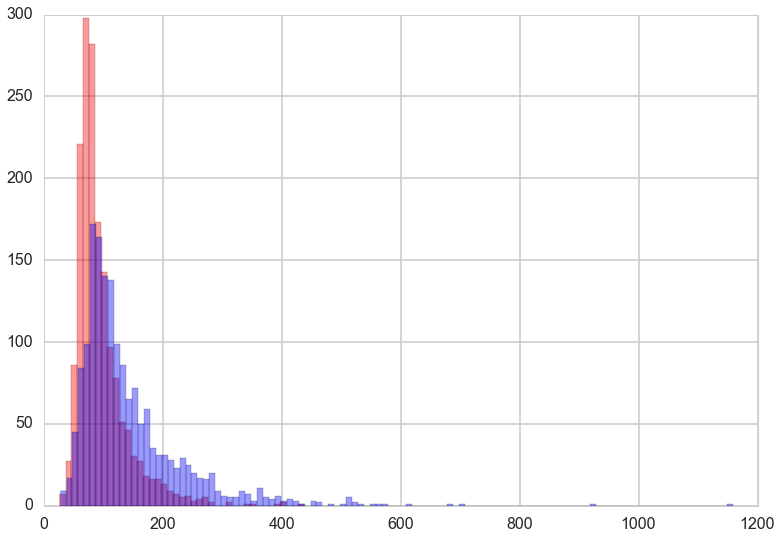

In [17]:
plt.hist(zip_MSPPS_notNAN['2000-01'].values, bins=np.arange(min(zip_MSPPS_notNAN['2000-01'].values), max(zip_MSPPS_notNAN['2000-01'].values) + 10, 10), color = 'r', alpha = 0.4)
plt.hist(zip_MSPPS_notNAN['2010-01'].values, bins=np.arange(min(zip_MSPPS_notNAN['2010-01'].values), max(zip_MSPPS_notNAN['2010-01'].values) + 10, 10), color = 'b', alpha = 0.4)

In [18]:
zip_MSPPS_notNAN['2000_agg'] = (zip_MSPPS_notNAN['2000-01'] + zip_MSPPS_notNAN['2001-01'] + zip_MSPPS_notNAN['1999-01'])/3
zip_MSPPS_notNAN['2010_agg'] = (zip_MSPPS_notNAN['2010-01'] + zip_MSPPS_notNAN['2011-01'] + zip_MSPPS_notNAN['2009-01'])/3
zip_MSPPS_notNAN['pct_delta'] = zip_MSPPS_notNAN['2010_agg']/zip_MSPPS_notNAN['2000_agg']

/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [19]:
zip_MSPPS_notNAN.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2000_agg,2010_agg,pct_delta
1,84630,60629,Chicago,IL,Chicago,Cook,2,83.37290,81.9039,86.2227,88.2281,92.4941,88.4356,84.2880,86.4587,87.2849,82.1885,84.3404,85.3516,83.9546,80.3261,80.8496,85.4139,87.8756,86.3272,86.9252,88.9441,84.8332,82.1182,82.8501,85.955400,85.4117,85.6305,90.6093,92.3588,95.8791,95.4600,97.4595,94.5612,91.3699,91.5263,90.7089,94.4271,92.9856,93.5025,95.1732,98.5480,97.9914,100.6991,101.1288,...,95.8577,101.924600,106.3171,109.1850,115.7075,120.956500,124.7645,123.4396,118.7330,122.6573,106.9069,103.3210,102.9773,101.9681,108.3858,102.5008,111.5418,110.0932,103.3630,94.8442,99.4525,103.1513,123.4814,119.6632,125.0165,118.4917,112.1278,121.5239,120.1162,115.293300,103.5425,105.5923,121.6394,126.17420,125.6553,116.9917,113.141500,118.9884,107.6563,107.276200,109.5701,116.6246,111.9092,114.7804,127.9313,132.5965,131.306100,98.682400,115.605500,1.171491
2,96193,90650,Norwalk,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,3,117.39690,118.0225,113.3146,112.0347,114.1521,113.2268,111.2448,109.2356,112.6931,115.6738,115.9940,108.9467,113.3924,110.7738,108.5902,110.6241,113.3821,117.6624,114.2688,112.9188,114.2251,116.3165,111.2844,111.104200,112.2943,117.9401,117.9640,117.6704,117.3105,114.7438,115.1906,113.4917,119.0176,118.3696,119.5861,120.8136,122.6741,122.6501,123.3720,124.8398,125.4529,126.7413,127.6706,...,219.8136,236.888700,234.3855,225.6425,229.9889,224.835300,227.7036,234.5118,234.7218,228.2131,221.8379,231.7794,230.8116,249.9534,258.6240,247.0731,248.9392,250.8335,266.6558,266.6535,268.9651,282.5015,287.1165,293.1764,281.2928,291.0114,282.9296,298.6052,289.6318,294.915300,300.2414,303.2769,291.9878,303.57810,314.2814,327.2802,317.249600,312.0753,297.1876,287.113100,305.2852,314.4935,339.6102,341.7029,339.3655,336.4867,343.498500,130.505400,229.691000,1.760011
7,96125,90280,South Gate,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,8,118.30150,121.3851,117.8144,122.3694,124.6468,122.9418,119.5063,118.1009,122.6550,121.1318,118.7361,112.8810,115.2853,114.9234,116.5601,115.7037,115.4531,117.2410,123.1254,117.5763,116.3737,117.3234,112.4569,116.410400,120.8716,121.4901,117.2832,119.2311,118.1527,123.1749,115.0169,114.8405,117.6092,119.9959,121.5556,118.0527,118.2184,119.1929,122.5280,119.8428,115.2839,117.3491,119.3010,...,NaN,214.758811,202.8838,NaN,NaN,191.730827,NaN,202.3067,213.5910,NaN,201.5256,NaN,228.0380,NaN,209.3866,207.7554,222.7143,214.7797,245.8332,237.6460,215.1479,236.1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.610169,NaN,NaN,NaN,272.65861,NaN,NaN,242.248062,NaN,NaN,266.089109,267.5440,281.4984,303.1221,312.5424,NaN,NaN,279.620853,130.197000,212.896167,1.635185
10,84620,60618,Chicago,IL,Chicago,Cook,11,130.28169,121.4685,127.4808,125.9311,119.8565,107.3306,103.7671,112.6521,118.0756,107.7247,NaN,102.1097,107.0049,110.6245,122.6887,115.8170,110.1592,118.9129,119.0890,114.2983,107.8967,NaN,NaN,138.190955,124.6543,122.2254,143.4391,127.7708,118.8031,125.8294,133.5715,123.8324,127.8238,120.7668,118.3218,118.3846,133.5493,152.1399,134.9239,140.7404,167.3603,173.1714,152.8913,...,224.3826,231.606600,NaN,222.1806,202.4930,219.852200,223.6268,237.7173,249.2751,226.0825,224.8802,238.2890,236.9822,215.7680,196.7915,NaN,226.3855,251.

(0, 1100)

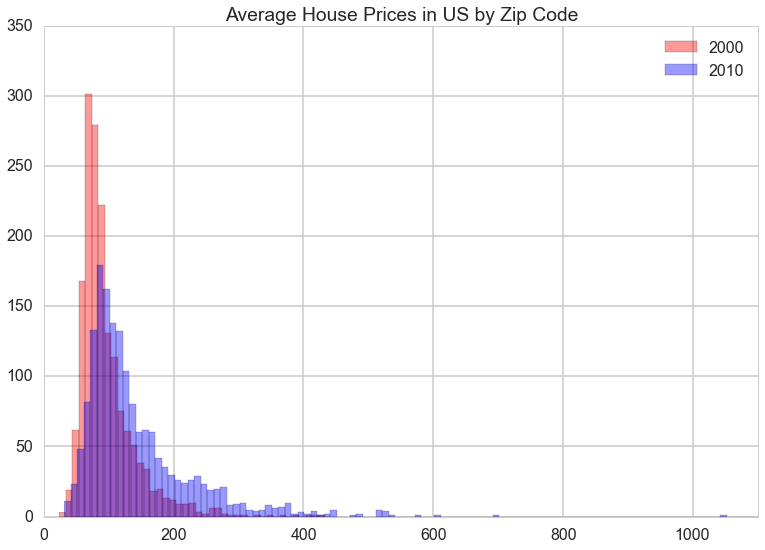

In [20]:
plt.hist(zip_MSPPS_notNAN['2000_agg'].values, bins=np.arange(min(zip_MSPPS_notNAN['2000_agg'].values), max(zip_MSPPS_notNAN['2000_agg'].values) + 10, 10), color = 'r', alpha = 0.4, label = '2000')
plt.hist(zip_MSPPS_notNAN['2010_agg'].values, bins=np.arange(min(zip_MSPPS_notNAN['2010_agg'].values), max(zip_MSPPS_notNAN['2010_agg'].values) + 10, 10), color = 'b', alpha = 0.4, label = '2010')
plt.legend()
plt.title('Average House Prices in US by Zip Code')
plt.xlim(0,1100)

(0, 10)

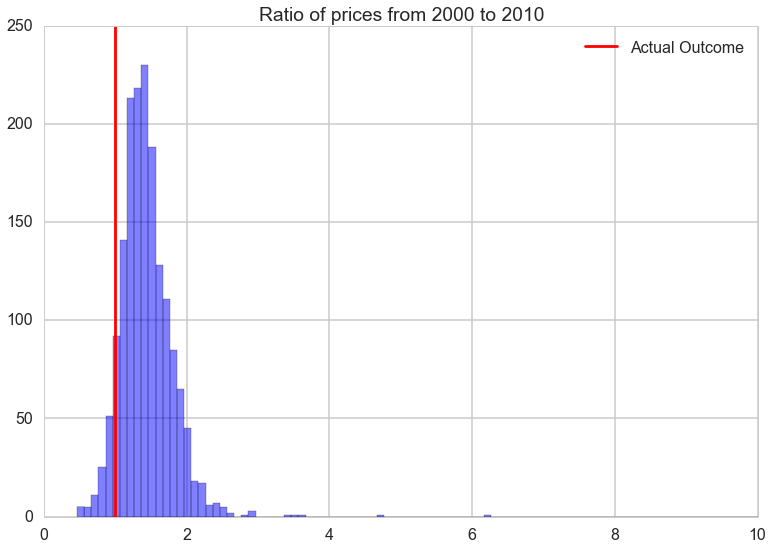

In [24]:
plt.hist(zip_MSPPS_notNAN['pct_delta'].values, bins=np.arange(min(zip_MSPPS_notNAN['pct_delta'].values), max(zip_MSPPS_notNAN['pct_delta'].values) + .1, .1), color = 'b', alpha = 0.5)
plt.axvline(1, 0, 1, color='r', label='Actual Outcome')
plt.legend()
plt.title('Ratio of prices from 2000 to 2010 ')
plt.xlim(0,10)

<a id="dem_data"></a>
## 2.2 Demographic Data

Talk about demographic data and include code for how it was cleaned.

<a id="biz_data"></a>
## 2.3 Business Data

Talk about data scraping and cleaning from Yelp.

<a id="exploration"></a>
# 3. Exploratory Data Analysis

<a id="exploration"></a>
## 3.1 Neighborhood Trends in Business and Demographics

Demographic data: do a heat map of single householder and others (minority races?) 

Business data: rank industries by number of zip codes with that industry as the most popular, map out business data as well?

<a id="exploration_price"></a>
## 3.2 House and Rent Price Trends

Listing out top and bottom performers in bar charts too? Doing a quick case study in Cali?

<img src="images/PriceToRent.png">
We generated some choropleth maps using d3 to visualize what some of these metrics looked like across the country from 2011 to 2015. This is displayed on the county level, with data lacking in the white areas. With regards to price-to-rent ratio, we saw that it seemed to be getting cheaper to rent than to buy a home (as indicated by higher price-to-rent ratios) in California in 2015 compared to 2011. 

<img src="images/Delta.png">
This visualization, which shows the percentage change in the price-to-rent ratio, confirms our hypothesis about renting in California. Along with California, Michigan and the south of Florida seem to be areas where it is becoming increasingly cheaper to rent than to buy a home.

<a id="modeling"></a>
# 4. Modeling

<a id="modeling"></a>
## 4.1 Model Features

<a id="model_train"></a>
## 4.2 Test/Train Data

<a id="baseline"></a>
## 4.3 Baseline Prediction

<a id="regression"></a>
## 4.4 Regression 
Include graphs for evaluation (and all the other models we used)

<a id="conclusion"></a>
# 5. Conclusion

What were our findings?
Evaluate each model and talk about next steps.